<a href="https://colab.research.google.com/github/amitashnanda/Circadian-Rhythm-driven-Alertness-Investigation/blob/main/143_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# read the excel file
# Note I have removed the first Row manually so please use that data/file format
df_143 = pd.read_excel('/content/drive/MyDrive/data143.xlsx')

In [ ]:
df_143 = pd.read_excel('/content/drive/MyDrive/data143_final.xlsx', sheet_name='Table 2',usecols=range(0, 8))
# Using only first 8 columns
print(df_143.head(10))
print(df_143.tail(10))

       username        age sex        bmi  psqi   race zygosity country
0  predict10091  53.645448   F  25.530409   5.0  White       MZ      GB
1  predict10092  53.645448   F  24.272560   8.0  White       MZ      GB
2  predict10181  43.110198   F  21.620041   3.0  White       MZ      GB
3  predict10182  42.967830   F  22.728657   2.0  White       MZ      GB
4  predict10332  62.140999   F  22.374670   4.0  White       MZ      GB
5  predict10691  59.567420   F  28.870464   4.0  White       MZ      GB
6  predict10692  59.567420   F  27.297931   4.0  White       MZ      GB
7  predict10821  51.578371   F  29.452598  10.0  White       MZ      GB
8  predict11101  46.633812   F  29.878078   3.0  White       MZ      GB
9  predict11102  46.633812   F  30.031151   7.0  White       MZ      GB
      username  age  sex  bmi  psqi race zygosity country
89525      NaN  NaN  NaN  NaN   NaN  NaN      NaN     NaN
89526      NaN  NaN  NaN  NaN   NaN  NaN      NaN     NaN
89527      NaN  NaN  NaN  NaN   Na

In [ ]:
#Remove NAN values
df_143 = df_143.dropna(how='all')
print(df_143.tail(10))

          username        age sex        bmi  psqi            race zygosity  \
823  predict998921  49.412731   M  23.959078   NaN           Asian       NT   
824  predict998931  58.412047   F  22.562388   NaN           White       NT   
825  predict998941  34.083504   F  25.464608   NaN           White       NT   
826  predict998951  58.329911   F  26.062282   NaN           White       NT   
827  predict998961  58.414784   M  27.522406   NaN           White       NT   
828  predict998971  59.427789   F  25.607152   NaN  Other or Mixed       NT   
829  predict998981  64.342231   M  30.371478   NaN           White       NT   
830  predict998991  30.844627   F  22.920658   NaN           White       NT   
831  predict999001  42.184805   F  21.942190   NaN         African       NT   
832    predict9991  55.822040   F  26.113602   5.0           White       MZ   

    country  
823      US  
824      US  
825      US  
826      US  
827      US  
828      US  
829      US  
830      US  
831 

In [ ]:
df_143 = df_143.dropna(subset=['psqi'])

In [ ]:
df_143['age'] = df_143['age'].round(0)
df_143['bmi'] = df_143['bmi'].round(2)
df_143['psqi'] = df_143['psqi'].astype(int)
df_143['age'] = df_143['age'].astype(int)


In [ ]:
df_143.tail(10)
#NOTE NO PSQI values available for people in US

,username,age,sex,bmi,psqi,race,zygosity,country
739,predict97552,20,F,24.26,0,White,DZ,GB
740,predict97751,30,F,28.88,11,White,MZ,GB
741,predict97752,30,F,28.83,3,White,MZ,GB
742,predict97851,57,M,29.79,5,White,MZ,GB
743,predict97892,34,F,23.96,6,Other or Mixed,MZ,GB
744,predict98941,58,F,34.37,6,White,DZ,GB
745,predict99071,38,F,26.37,3,White,DZ,GB
746,predict99721,65,F,24.05,4,White,MZ,GB
747,predict99722,65,F,28.90,2,White,MZ,GB
832,predict9991,56,F,26.11,5,White,MZ,GB


In [ ]:
df1 = df_143
df = df_143

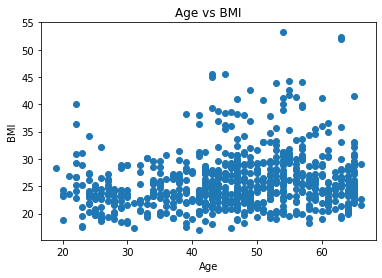

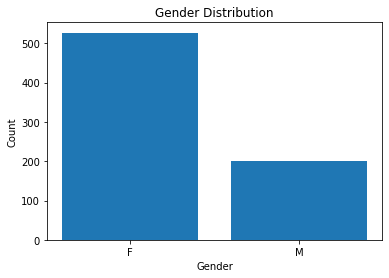

In [ ]:
# create a scatter plot of age vs BMI
import matplotlib.pyplot as plt
plt.scatter(df1['age'], df1['bmi'])
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

# create a bar plot of gender distribution
gender_counts = df1['sex'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# SAMP

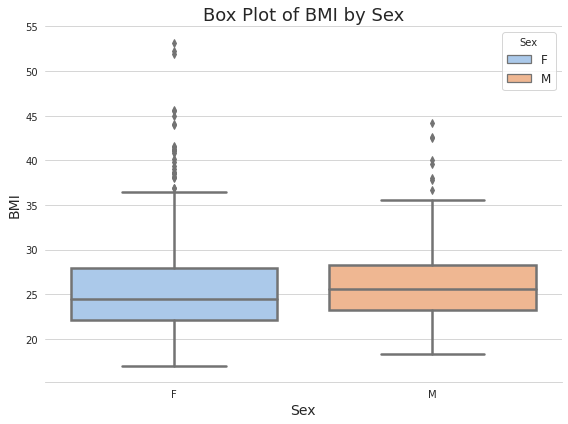

In [ ]:
#SAMPLE BOX PLOT
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("pastel")

fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="sex", y="bmi", data=df, ax=ax, hue='sex', dodge=False, linewidth=2.5)
sns.despine(left=True)

ax.set_title("Box Plot of BMI by Sex", fontsize=18)
ax.set_xlabel("Sex", fontsize=14)
ax.set_ylabel("BMI", fontsize=14)
ax.legend(loc='best', title="Sex", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# create a scatter plot of age vs BMI
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column
source = ColumnDataSource(data=dict(age=df['age'], bmi=df['bmi']))
p1 = figure(title='Age vs BMI', x_axis_label='Age', y_axis_label='BMI')
p1.circle('age', 'bmi', source=source)

# create a bar plot of gender distribution
gender_counts = df['sex'].value_counts()
gender_list = gender_counts.index.tolist()
count_list = gender_counts.tolist()
source = ColumnDataSource(data=dict(gender=gender_list, count=count_list))
p2 = figure(title='Gender Distribution', x_range=gender_list, x_axis_label='Gender', y_axis_label='Count')
p2.vbar(x='gender', top='count', width=0.5, source=source)

# display the plots
show(column(row(p1), row(p2)))

In [ ]:
# find the maximum and minimum values of BMI
max_bmi = df['bmi'].max()
min_bmi = df['bmi'].min()

# print the results
print("Maximum BMI:", max_bmi)
print("Minimum BMI:", min_bmi)

Maximum BMI: 53.2
Minimum BMI: 17.01


In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral4
import pandas as pd

In [ ]:
# Define BMI ranges and categories
bmi_ranges = [(0, 18.5), (18.5, 25), (25, 30), (30, df['bmi'].max() + 1)]
bmi_categories = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese']

# Create a dictionary to count the number of people in each BMI category
bmi_counts = {'Underweight': 0, 'Healthy Weight': 0, 'Overweight': 0, 'Obese': 0}

for i in range(len(bmi_ranges)):
    lower_bound = bmi_ranges[i][0]
    upper_bound = bmi_ranges[i][1]
    category = bmi_categories[i]
    count = ((df['bmi'] >= lower_bound) & (df['bmi'] < upper_bound)).sum()
    bmi_counts[category] = count

# Create a ColumnDataSource
source = ColumnDataSource(data={
    'bmi_categories': bmi_categories,
    'bmi_counts': [bmi_counts[cat] for cat in bmi_categories]
})

# Create the plot
p = figure(x_range=bmi_categories, plot_height=400, plot_width=600,
           title='BMI Distribution', tools='pan,wheel_zoom,reset')
p.vbar(x='bmi_categories', top='bmi_counts', width=0.9, source=source,
       fill_color='navy', line_color='white')

# Set axis labels
p.xaxis.axis_label = 'BMI Categories'
p.yaxis.axis_label = 'Number of People'

# Show the plot
show(p)

In [ ]:
# find the maximum and minimum values of age
max_age = df['age'].max()
min_age = df['age'].min()

# print the results
print("Maximum BMI:", max_age)
print("Minimum BMI:", min_age)

Maximum BMI: 66
Minimum BMI: 19


In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Range1d, FactorRange
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

# get the counts of people in each age range
age_ranges = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
age_counts = []
for i in range(len(age_ranges)):
    if i == len(age_ranges) - 1:
        count = len(df[(df['age'] >= int(age_ranges[i].split('-')[0])) & (df['age'] <= int(age_ranges[i].split('-')[1]))])
    else:
        count = len(df[(df['age'] >= int(age_ranges[i].split('-')[0])) & (df['age'] < int(age_ranges[i].split('-')[1]))])
    age_counts.append(count)

# create a ColumnDataSource with the data
source = ColumnDataSource(data=dict(age_ranges=age_ranges, age_counts=age_counts))

# create the figure
p = figure(x_range=FactorRange(factors=age_ranges), y_range=Range1d(0, max(age_counts) + 50), plot_height=400, plot_width=800, title="Age Ranges")

# add the bars to the plot
p.vbar(x='age_ranges', top='age_counts', width=0.9, source=source, line_color='white', fill_color='navy')

# set the x-axis and y-axis labels
p.xaxis.axis_label = "Age Ranges"
p.yaxis.axis_label = "Number of People"

# show the plot
output_notebook()
show(p)






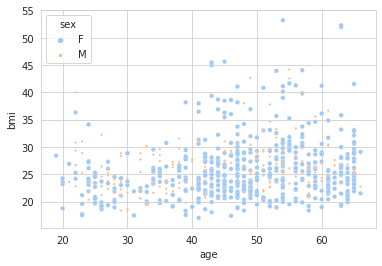

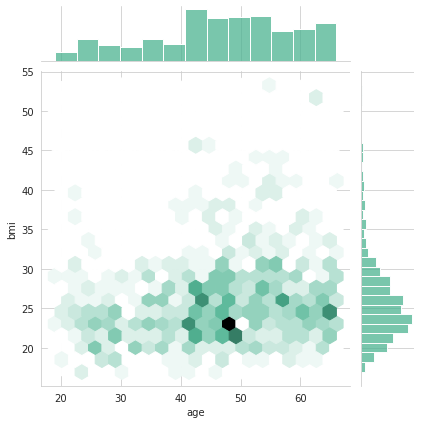

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# create scatter plot with different colors and sizes based on gender
sns.scatterplot(data=df1, x="age", y="bmi", hue="sex", size="sex", sizes=(5, 20))

# create heatmap based on age and bmi
sns.jointplot(data=df, x="age", y="bmi", kind="hex", color="#4CB391")

# display the plots
plt.show()


In [ ]:
######################### COmparing columns from Table 2 and table 3

In [ ]:
df_3 = pd.read_excel('/content/drive/MyDrive/data143_final.xlsx', sheet_name='Table 3',usecols=range(0, 8))
df_2 = pd.read_excel('/content/drive/MyDrive/data143_final.xlsx', sheet_name='Table 2',usecols=range(0, 8))
df_2 = df_2.dropna(how='all')
df_3 = df_3.dropna(how='all')

df_2 = df_2.dropna(subset=['psqi'])
df_2 = df_2.reset_index(drop=True)
print(df_2.head(10))
############################################



print(df_3.head(10))



       username        age sex        bmi  psqi   race zygosity country
0  predict10091  53.645448   F  25.530409   5.0  White       MZ      GB
1  predict10092  53.645448   F  24.272560   8.0  White       MZ      GB
2  predict10181  43.110198   F  21.620041   3.0  White       MZ      GB
3  predict10182  42.967830   F  22.728657   2.0  White       MZ      GB
4  predict10332  62.140999   F  22.374670   4.0  White       MZ      GB
5  predict10691  59.567420   F  28.870464   4.0  White       MZ      GB
6  predict10692  59.567420   F  27.297931   4.0  White       MZ      GB
7  predict10821  51.578371   F  29.452598  10.0  White       MZ      GB
8  predict11101  46.633812   F  29.878078   3.0  White       MZ      GB
9  predict11102  46.633812   F  30.031151   7.0  White       MZ      GB
       username        age sex    family_id zygosity  al_rating  \
0  predict10091  53.645448   F  predict1009       MZ  53.855556   
1  predict10092  53.645448   F  predict1009       MZ  62.335164   
2  pred

In [ ]:
extra_usernames = set(df_2['username']) - set(df_3['username'])
extra_usernames = sorted(extra_usernames )
# Print the extra usernames in sheet 1
print('Extra usernames in Sheet 1:')

for username in extra_usernames:
    print(username)

print(len(extra_usernames))

Extra usernames in Sheet 1:
predict1113
predict14638
predict18168
predict32963
predict71043
predict87109
predict87723
predict89218
predict900091
predict900301
predict900331
predict900351
predict900391
predict900521
predict900541
predict900571
predict900581
predict900591
predict900651
predict900661
predict900671
predict900691
predict900701
predict900791
predict900821
predict900831
predict900861
predict900881
predict900901
predict900911
predict900921
predict900931
predict900941
predict900951
predict900961
predict900971
predict900981
predict901011
predict901021
predict901051
predict901071
predict901111
predict901131
predict901161
predict901171
predict901181
predict901211
predict901221
predict901251
predict901311
predict901351
predict901361
predict901391
predict901411
predict901451
predict901461
predict901491
predict901541
predict901551
predict901561
predict901571
predict901581
predict901591
predict901621
predict901641
predict901661
predict901681
predict901721
predict901731
predict901741
p

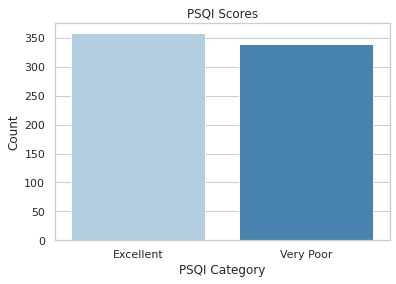

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the bin ranges and labels
bin_ranges = [0, 4, 21]
bin_labels = ['Excellent', 'Very Poor']

# Cut the PSQI scores into bins and assign labels
df['psqi_bin'] = pd.cut(df_2['psqi'], bins=bin_ranges, labels=bin_labels)

# Create a countplot using seaborn
sns.set(style='whitegrid')
sns.countplot(x='psqi_bin', data=df, palette='Blues')

# Set the x-axis labels using the bin_labels
plt.xticks(ticks=range(len(bin_labels)), labels=bin_labels)

# Set the plot title and axis labels
plt.title('PSQI Scores')
plt.xlabel('PSQI Category')
plt.ylabel('Count')

# Show the plot
plt.show()


In [ ]:
#Check different types of zygocity

In [ ]:
print(df_2['zygosity'].unique())

['MZ' 'NT' 'DZ']


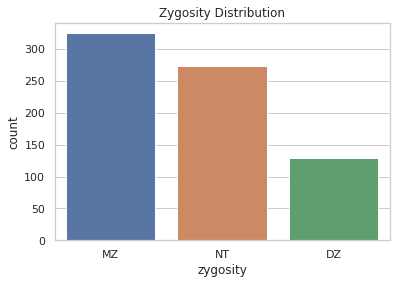

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe (assuming it's already done)
# and store it in a variable called 'df'

# Set the style of the plot
sns.set_style("whitegrid")

# Create a countplot using seaborn
sns.countplot(x='zygosity', data=df_2)

# Add a title to the plot
plt.title("Zygosity Distribution")

# Show the plot
plt.show()


In [ ]:
df_2 = pd.read_excel('/content/drive/MyDrive/data143_final.xlsx', sheet_name='Table 2',usecols=range(0, 8))

In [ ]:
df_2 = df_2.dropna(how='all')
df_2 = df_2.dropna(subset=['psqi'])
df_2 = df_2.reset_index(drop=True)
df_2.tail(10)

,username,age,sex,bmi,psqi,race,zygosity,country
717,predict97552,19.928816,F,24.264481,0.0,White,DZ,GB
718,predict97751,29.659138,F,28.877844,11.0,White,MZ,GB
719,predict97752,29.659138,F,28.826012,3.0,White,MZ,GB
720,predict97851,57.489391,M,29.791647,5.0,White,MZ,GB
721,predict97892,34.472279,F,23.964314,6.0,Other or Mixed,MZ,GB
722,predict98941,58.316222,F,34.372539,6.0,White,DZ,GB
723,predict99071,37.738535,F,26.368549,3.0,White,DZ,GB
724,predict99721,64.991102,F,24.051183,4.0,White,MZ,GB
725,predict99722,64.991102,F,28.895870,2.0,White,MZ,GB
726,predict9991,55.822040,F,26.113602,5.0,White,MZ,GB


In [ ]:
import pandas as pd
# Read in the Excel sheet
df = pd.read_excel('/content/drive/MyDrive/data143_final.xlsx', sheet_name='Table 2')

# Select columns 1 to 8 and column 17
new_df = df.iloc[:, 0:8]
new_df['new_column'] = df.iloc[:, 17]

# Print the new DataFrame
print(new_df)


           username        age  sex        bmi  psqi   race zygosity country  \
0      predict10091  53.645448    F  25.530409   5.0  White       MZ      GB   
1      predict10092  53.645448    F  24.272560   8.0  White       MZ      GB   
2      predict10181  43.110198    F  21.620041   3.0  White       MZ      GB   
3      predict10182  42.967830    F  22.728657   2.0  White       MZ      GB   
4      predict10332  62.140999    F  22.374670   4.0  White       MZ      GB   
...             ...        ...  ...        ...   ...    ...      ...     ...   
89530           NaN        NaN  NaN        NaN   NaN    NaN      NaN     NaN   
89531           NaN        NaN  NaN        NaN   NaN    NaN      NaN     NaN   
89532           NaN        NaN  NaN        NaN   NaN    NaN      NaN     NaN   
89533           NaN        NaN  NaN        NaN   NaN    NaN      NaN     NaN   
89534           NaN        NaN  NaN        NaN   NaN    NaN      NaN     NaN   

       new_column  
0            53.0  

In [ ]:
new_df = new_df.rename(columns={'new_column': 'al_rating'})

In [ ]:
print(new_df)

           username        age  sex        bmi  psqi   race zygosity country  \
0      predict10091  53.645448    F  25.530409   5.0  White       MZ      GB   
1      predict10092  53.645448    F  24.272560   8.0  White       MZ      GB   
2      predict10181  43.110198    F  21.620041   3.0  White       MZ      GB   
3      predict10182  42.967830    F  22.728657   2.0  White       MZ      GB   
4      predict10332  62.140999    F  22.374670   4.0  White       MZ      GB   
...             ...        ...  ...        ...   ...    ...      ...     ...   
89530           NaN        NaN  NaN        NaN   NaN    NaN      NaN     NaN   
89531           NaN        NaN  NaN        NaN   NaN    NaN      NaN     NaN   
89532           NaN        NaN  NaN        NaN   NaN    NaN      NaN     NaN   
89533           NaN        NaN  NaN        NaN   NaN    NaN      NaN     NaN   
89534           NaN        NaN  NaN        NaN   NaN    NaN      NaN     NaN   

       al_rating  
0           53.0  
1

In [ ]:
#Remove NAN values
new_df =  new_df.dropna()
# Print the new DataFrame
print(new_df.tail(10))


         username        age sex        bmi  psqi            race zygosity  \
739  predict97552  19.928816   F  24.264481   0.0           White       DZ   
740  predict97751  29.659138   F  28.877844  11.0           White       MZ   
741  predict97752  29.659138   F  28.826012   3.0           White       MZ   
742  predict97851  57.489391   M  29.791647   5.0           White       MZ   
743  predict97892  34.472279   F  23.964314   6.0  Other or Mixed       MZ   
744  predict98941  58.316222   F  34.372539   6.0           White       DZ   
745  predict99071  37.738535   F  26.368549   3.0           White       DZ   
746  predict99721  64.991102   F  24.051183   4.0           White       MZ   
747  predict99722  64.991102   F  28.895870   2.0           White       MZ   
832   predict9991  55.822040   F  26.113602   5.0           White       MZ   

    country  al_rating  
739      GB       74.0  
740      GB       74.0  
741      GB       47.0  
742      GB       81.0  
743      GB     

In [ ]:
new_df = new_df.dropna(subset=['psqi'])

In [ ]:
new_df['age'] = new_df['age'].round(0)
new_df['bmi'] = new_df['bmi'].round(2)
new_df['psqi'] = new_df['psqi'].astype(int)
new_df['age'] = new_df['age'].astype(int)
new_df['al_rating'] = new_df['al_rating'].astype(int)

In [ ]:
df = new_df

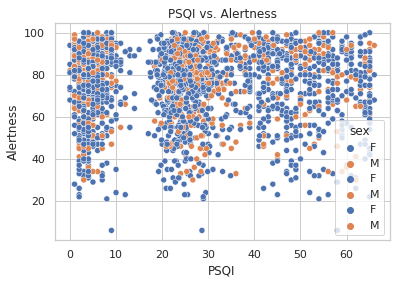

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot of age vs. alertness
sns.scatterplot(x='age', y='al_rating', data=df, hue='sex')
plt.title('Age vs. Alertness')
plt.xlabel('Age')
plt.ylabel('Alertness')

# Scatterplot of BMI vs. alertness
sns.scatterplot(x='bmi', y='al_rating', data=df, hue='sex')
plt.title('BMI vs. Alertness')
plt.xlabel('BMI')
plt.ylabel('Alertness')

# Scatterplot of PSQI vs. alertness
sns.scatterplot(x='psqi', y='al_rating', data=df, hue='sex')
plt.title('PSQI vs. Alertness')
plt.xlabel('PSQI')
plt.ylabel('Alertness')

plt.show()


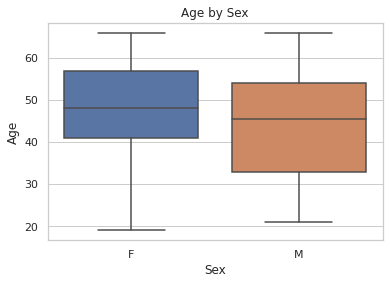

In [ ]:
# Boxplot of age by sex
sns.boxplot(x='sex', y='age', data=df)
plt.title('Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()


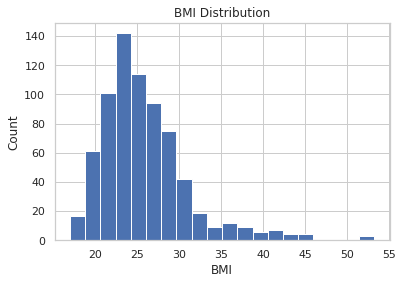

In [ ]:
# Histogram of BMI
plt.hist(x='bmi', data=df, bins=20)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


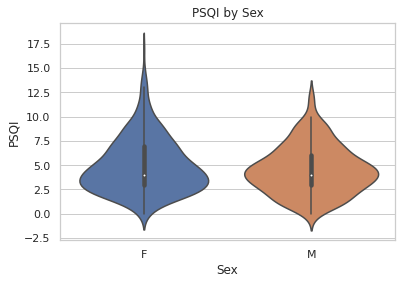

In [ ]:
# Violin plot of PSQI by sex
sns.violinplot(x='sex', y='psqi', data=df)
plt.title('PSQI by Sex')
plt.xlabel('Sex')
plt.ylabel('PSQI')
plt.show()


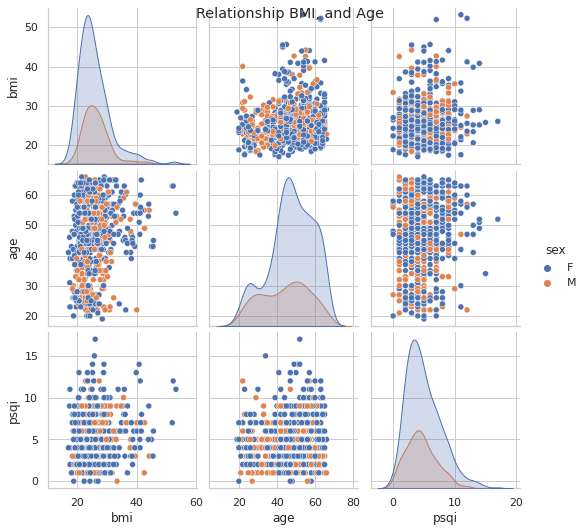

In [ ]:
import seaborn as sns

# Create a scatterplot matrix
sns.pairplot(data=df, vars=['bmi', 'age','psqi'], hue='sex')

# Set the title of the plot
plt.suptitle('Relationship BMI, and Age')

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Read the Excel file into a pandas DataFrame
df =  pd.read_excel('/content/drive/MyDrive/data143_final.xlsx', sheet_name='Table 2')

# Select only the K, L, and R columns



KeyError: ignored

In [ ]:
df = df[['spt', 'se', 'al_rating']]

In [ ]:
df.head(10)

,spt,se,al_rating
0,8.497222,0.899150,53.0
1,9.959722,0.921071,54.0
2,8.426389,0.859733,58.0
3,9.122222,0.953715,64.0
4,10.604167,0.896136,31.0
5,10.211111,0.964363,37.0
6,4.544444,0.943765,57.0
7,8.729167,0.872713,24.0
8,7.843056,0.910572,34.0
9,7.576389,0.944271,52.0


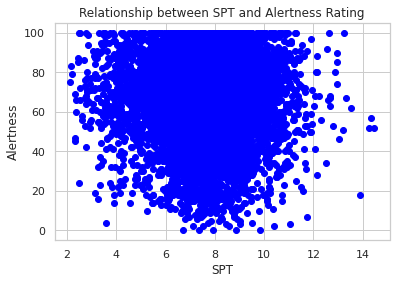

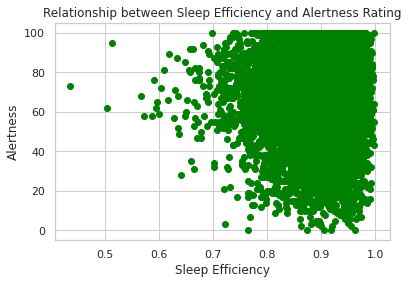

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a scatter plot of SPT vs alertness rating
plt.scatter(df['spt'], df['al_rating'], color='blue')
plt.xlabel('SPT')
plt.ylabel('Alertness')
plt.title('Relationship between SPT and Alertness Rating')
plt.show()

# Create a scatter plot of sleep efficiency vs alertness rating
plt.scatter(df['se'], df['al_rating'], color='green')
plt.xlabel('Sleep Efficiency')
plt.ylabel('Alertness')
plt.title('Relationship between Sleep Efficiency and Alertness Rating')
plt.show()


<ipython-input-5-34ba5eed51a8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spt_categories'] = pd.cut(df['spt'], bins=[0,3,6,9,12], labels=['poor', 'medium', 'good', 'too much'])


<AxesSubplot:xlabel='spt_categories', ylabel='al_rating'>

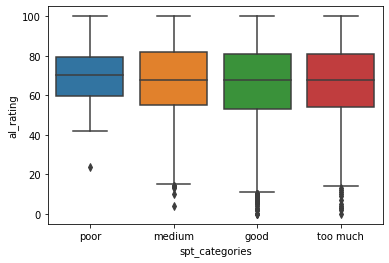

In [ ]:
import pandas as pd
import seaborn as sns

# read in your dataframe with sleep period time and aleartness rating


# create a new column for spt_categories based on the sleep period time
df['spt_categories'] = pd.cut(df['spt'], bins=[0,3,6,9,12], labels=['poor', 'medium', 'good', 'too much'])

# plot the distribution of al_rating for each spt_category using boxplot
sns.boxplot(x='spt_categories', y='al_rating', data=df)


<ipython-input-7-48040489d4ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sleep_quality'] = pd.cut(df['spt'], bins=[0, 3, 6, 9, 12], labels=['poor', 'medium', 'good', 'too much'])


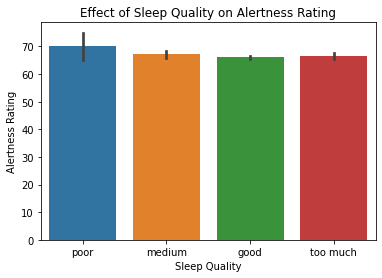

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for sleep quality category based on SPT
df['sleep_quality'] = pd.cut(df['spt'], bins=[0, 3, 6, 9, 12], labels=['poor', 'medium', 'good', 'too much'])

# Create a bar plot of sleep quality category vs. alertness rating
sns.barplot(x='sleep_quality', y='al_rating', data=df, order=['poor', 'medium', 'good', 'too much'])

# Set the plot title and axis labels
plt.title('Effect of Sleep Quality on Alertness Rating')
plt.xlabel('Sleep Quality')
plt.ylabel('Alertness Rating')

# Show the plot
plt.show()


<ipython-input-8-3589e70e7b96>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sleep_quality'] = pd.cut(df['spt'], bins=bins, labels=labels)


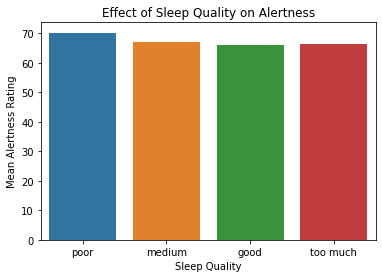

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# create a new column with the sleep quality categories
bins = [0, 3, 6, 9, 12]
labels = ['poor', 'medium', 'good', 'too much']
df['sleep_quality'] = pd.cut(df['spt'], bins=bins, labels=labels)

# calculate the mean AL rating for each sleep quality category
mean_ratings = df.groupby('sleep_quality')['al_rating'].mean()

# create a bar plot with mean AL rating on the y-axis
sns.barplot(x=mean_ratings.index, y=mean_ratings.values)

# set plot labels
plt.title('Effect of Sleep Quality on Alertness')
plt.xlabel('Sleep Quality')
plt.ylabel('Mean Alertness Rating')

# show plot
plt.show()


In [ ]:
df =  pd.read_excel('/content/drive/MyDrive/data143_final.xlsx', sheet_name='Table 3')

In [ ]:
df = df[['spt', 'se', 'al_rating_morning','happiness']]

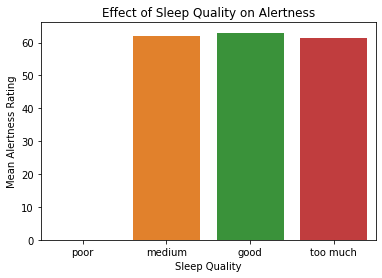

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# create a new column with the sleep quality categories
bins = [0, 3, 6, 9, 12]
labels = ['poor', 'medium', 'good', 'too much']
df['sleep_quality'] = pd.cut(df['spt'], bins=bins, labels=labels)

# calculate the mean AL rating for each sleep quality category
mean_ratings = df.groupby('sleep_quality')['al_rating_morning'].mean()

# create a bar plot with mean AL rating on the y-axis
sns.barplot(x=mean_ratings.index, y=mean_ratings.values)

# set plot labels
plt.title('Effect of Sleep Quality on Alertness')
plt.xlabel('Sleep Quality')
plt.ylabel('Mean Alertness Rating')

# show plot
plt.show()


<AxesSubplot:xlabel='spt_categories', ylabel='al_rating_morning'>

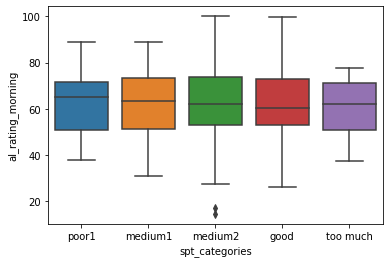

In [ ]:
import pandas as pd
import seaborn as sns

# read in your dataframe with sleep period time and aleartness rating


# create a new column for spt_categories based on the sleep period time
df['spt_categories'] = pd.cut(df['spt'], bins=[5,6,7,8,9,10,], labels=['poor1', 'medium1','medium2', 'good', 'too much'])

# plot the distribution of al_rating for each spt_category using boxplot
sns.boxplot(x='spt_categories', y='al_rating_morning', data=df)


In [ ]:
df = df.dropna(subset=['al_rating_morning'])
df = df.dropna(how='any')


In [ ]:
df = df.dropna(subset=['al_rating_morning'])
df = df.dropna(subset=['spt'])
df = df.dropna(subset=['happiness'])

In [ ]:
import plotly.graph_objs as go
import plotly.express as px

# create the 3D scatter plot
fig = px.scatter_3d(df, x='se', y='al_rating_morning', z='happiness', color='al_rating_morning', opacity=0.7)

# add axis labels and title
fig.update_layout(scene=dict(xaxis_title='Sleep Efficiency',
                             yaxis_title='Alertness Rating (Morning)',
                             zaxis_title='Happiness'),
                  title='Relationship between Sleep Efficiency, Alertness Rating, and Happiness')

# show the plot
fig.show()


In [ ]:
import plotly.express as px

fig = px.scatter(df, x="spt", y="al_rating_morning", size="se", color="happiness",
                 title="Relationship between SPT, Alertness and Happiness")
fig.show()


In [ ]:
df =  pd.read_excel('/content/drive/MyDrive/data143_final.xlsx', sheet_name='Table 2')

In [ ]:
df = df[['spt', 'se', 'al_rating','age','sex','bmi']]
df = df.dropna(how='any')


In [ ]:
import plotly.express as px

fig = px.scatter(df, x="al_rating", y="spt", size="age", color="se",
                 title="Relationship between SPT, Alertness and Happiness")
fig.show()


In [ ]:
df.head(10)

,spt,se,al_rating,age,sex,bmi
0,8.497222,0.899150,53.0,53.645448,F,25.530409
1,9.959722,0.921071,54.0,53.645448,F,24.272560
2,8.426389,0.859733,58.0,43.110198,F,21.620041
3,9.122222,0.953715,64.0,42.967830,F,22.728657
4,10.604167,0.896136,31.0,62.140999,F,22.374670
5,10.211111,0.964363,37.0,59.567420,F,28.870464
6,4.544444,0.943765,57.0,59.567420,F,27.297931
7,8.729167,0.872713,24.0,51.578371,F,29.452598
8,7.843056,0.910572,34.0,46.633812,F,29.878078
9,7.576389,0.944271,52.0,46.633812,F,30.031151
